Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# Loading dataset to a Panda dataFrame
creditcard_data = pd.read_csv('/content/creditcard.csv')

In [12]:
# first five rows of dataset
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [13]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0
25837,33787,1.303469,0.498450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# dataset information
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [15]:
# checking the number of missing values
creditcard_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [16]:
# distribution of legit transaction and fraudulent transcations
creditcard_data['Class'].value_counts()

,count
Class,
0.0,25749
1.0,88


This dataset is highly unbalanced

0 --> Normal Transaction

1 --> fraudulent Transaction

In [17]:
# separating the data for analysis
legit = creditcard_data[creditcard_data.Class == 0]
fraud = creditcard_data[creditcard_data.Class == 1]

In [18]:
print(legit.shape)
print(fraud.shape)

(25749, 31)
(88, 31)


In [19]:
# statistical measures of data
legit.Amount.describe()

,Amount
count,25749.000000
mean,75.726227
std,219.488324
min,0.000000
25%,6.200000
50%,18.960000
75%,67.500000
max,7879.420000


In [20]:
fraud.Amount.describe()

,Amount
count,88.000000
mean,100.010000
std,265.845031
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [21]:
# compare the values for both transcations
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,19380.491087,-0.197045,0.145743,0.767372,0.208854,-0.174420,0.088572,-0.100712,0.011278,0.453641,...,0.039986,-0.039570,-0.131409,-0.038716,0.012076,0.128670,0.022883,0.010424,0.003824,75.726227
1.0,17935.875000,-8.613716,6.376169,-12.221731,6.231847,-6.027247,-2.487080,-8.308784,4.351326,-2.987199,...,0.714069,0.539387,-0.381823,-0.350615,-0.252970,0.346695,0.179760,0.856336,0.100578,100.010000


Build a sample dataset containing similar distribution of normal and fraudulent transcations

Number of Fraudulent Transactions --> 492

In [22]:
legit_sample = legit.sample(n=492) # random sampling

Concatenating two DataFrames

In [23]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2101,1616,1.316848,0.380200,-0.031690,0.489612,0.095335,-0.577603,0.111820,-0.186474,-0.007294,...,-0.335712,-0.931600,0.018284,-0.478105,0.350088,0.144376,-0.019875,0.023603,1.29,0.0
11847,20358,1.261563,0.518611,0.463340,0.889840,-0.236478,-1.010670,0.038446,-0.322369,1.215733,...,-0.430907,-0.960583,0.133863,0.302707,0.216032,0.053646,-0.045240,0.025700,0.89,0.0
22755,32418,-1.478347,1.389310,0.562030,-0.766509,-0.658072,-0.547666,-0.189064,1.081581,-0.111082,...,-0.130404,-0.516212,0.005617,-0.020321,-0.163419,0.311121,0.142911,0.096823,4.00,0.0
10290,16212,-0.299324,1.257231,1.000234,-0.134403,0.847192,0.076643,0.578874,-0.008863,0.509616,...,-0.423955,-0.868077,-0.177034,-0.926412,-0.013620,0.084372,0.222425,0.072614,2.69,0.0
19502,30333,1.143921,-0.500647,0.964403,0.552418,-1.255009,-0.342574,-0.676852,0.028739,-1.084843,...,-0.144151,-0.056917,-0.023359,0.498339,0.316692,-0.335574,0.056830,0.039392,63.00,0.0


In [25]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,88


In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,19436.239837,-0.229858,0.170842,0.702050,0.294036,-0.126469,-0.006773,-0.173232,0.025019,0.429434,...,-0.025494,-0.014228,-0.191429,-0.040747,0.012082,0.111691,0.013913,0.033691,-0.007239,63.127663
1.0,17935.875000,-8.613716,6.376169,-12.221731,6.231847,-6.027247,-2.487080,-8.308784,4.351326,-2.987199,...,0.714069,0.539387,-0.381823,-0.350615,-0.252970,0.346695,0.179760,0.856336,0.100578,100.010000


Splitting the data into features and targets

In [46]:
x = new_dataset.drop(columns=['Class', 'Time'], axis=1)
y = new_dataset['Class']

In [28]:
print(x)

        Time        V1        V2        V3        V4        V5        V6  \
2101    1616  1.316848  0.380200 -0.031690  0.489612  0.095335 -0.577603   
11847  20358  1.261563  0.518611  0.463340  0.889840 -0.236478 -1.010670   
22755  32418 -1.478347  1.389310  0.562030 -0.766509 -0.658072 -0.547666   
10290  16212 -0.299324  1.257231  1.000234 -0.134403  0.847192  0.076643   
19502  30333  1.143921 -0.500647  0.964403  0.552418 -1.255009 -0.342574   
...      ...       ...       ...       ...       ...       ...       ...   
18773  29753  0.269614  3.549755 -5.810353  5.809370  1.538808 -2.269219   
18809  29785  0.923764  0.344048 -2.880004  1.721680 -3.019565 -0.639736   
20198  30852 -2.830984  0.885657  1.199930  2.861292  0.321669  0.289966   
23308  32686  0.287953  1.728735 -1.652173  3.813544 -1.090927 -0.984745   
23422  32745 -2.179135  0.020218 -2.182733  2.572046 -3.663733  0.081568   

             V7        V8        V9  ...       V20       V21       V22  \
2101   0.1118

In [29]:
print(y)

2101     0.0
11847    0.0
22755    0.0
10290    0.0
19502    0.0
        ... 
18773    1.0
18809    1.0
20198    1.0
23308    1.0
23422    1.0
Name: Class, Length: 580, dtype: float64


Split the data into training and testing data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [31]:
print(x.shape, x_train.shape, x_test.shape)

(580, 30) (464, 30) (116, 30)


Model Training

Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
# training the logistic regression model with training data
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [34]:
# accuracy on taining data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [35]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.978448275862069


In [36]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [37]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.9741379310344828


In [38]:
# Calculating recall, precision and F1 score for training data
from sklearn.metrics import recall_score, precision_score, f1_score

In [39]:
print('Recall score: ', recall_score(y_test, x_test_prediction))
print('Precision score: ', precision_score(y_test, x_test_prediction))

Recall score:  0.8333333333333334
Precision score:  1.0


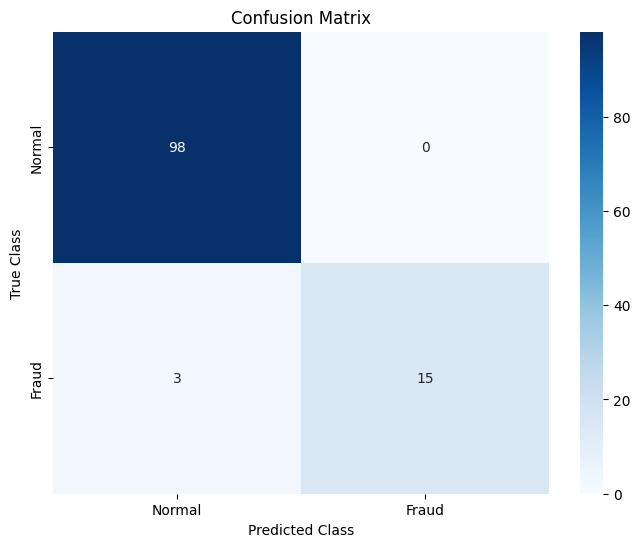

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, x_test_prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Testing the model with new dataset

In [40]:
# Assuming you have a new transaction data point as a pandas Series or DataFrame row
# Replace 'new_transaction_data' with your actual new data
# It should have the same columns as your training data (x)

# Example (replace with your actual new data):
# new_transaction_data = pd.DataFrame({
#     'Time': [100.0],
#     'V1': [-0.5],
#     'V2': [0.8],
#     # ... include all 30 feature columns ...
#     'Amount': [50.0]
# })


# # Make the prediction
# prediction = model.predict(new_transaction_data)

# # Interpret the prediction
# if prediction[0] == 0:
#     print("The transaction is predicted to be normal.")
# else:
#     print("The transaction is predicted to be fraudulent.")

In [52]:
# Load the new dataset
# Replace 'new_creditcard_2023.csv' with the actual path to your new dataset file
import pandas as pd
new_creditcard_data = pd.read_csv('/content/creditcard_2023.csv')

# Display the first few rows of the new dataset to verify
display(new_creditcard_data.head())

,Time,id,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,3628,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1251,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,1248,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,1658,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,1762,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [54]:
# Drop the 'id' and 'Class' columns from the new dataset as they were not used during training
new_creditcard_data_features = new_creditcard_data.drop(columns=['id', 'Class'], axis=1)

# Handle missing values by imputing with the mean
new_creditcard_data_features = new_creditcard_data_features.fillna(new_creditcard_data_features.mean())

# Make the prediction
prediction = model.predict(new_creditcard_data_features)

# Interpret the prediction for the first transaction
if prediction[0] == 0:
    print("The first transaction in the new dataset is predicted to be normal.")
else:
    print("The first transaction in the new dataset is predicted to be fraudulent.")

The first transaction in the new dataset is predicted to be normal.


# Credit Card Fraud Detection

## Project Overview

This project focuses on building a machine learning model to detect fraudulent credit card transactions. The goal is to identify potentially fraudulent activities based on transaction data.

## Data

The dataset used in this project is the "Credit Card Fraud Detection" dataset, which contains anonymized transaction data. Due to the sensitive nature of the data, the features (V1-V28) are the result of a PCA transformation. The only features not transformed are 'Time' and 'Amount'. The 'Class' column represents the target variable (0 for normal transactions, 1 for fraudulent).

## Methodology

1.  **Data Loading and Exploration:** Loaded and explored the dataset to understand its structure, check for missing values, and analyze the distribution of transactions.
2.  **Handling Class Imbalance:** Addressed the significant class imbalance by creating a balanced subset of the data through random sampling of normal transactions.
3.  **Data Splitting:** Split the balanced dataset into training and testing sets.
4.  **Model Training:** Trained a Logistic Regression model on the training data.
5.  **Model Evaluation:** Evaluated the model's performance using accuracy score on both the training and testing data.

## Results

The trained Logistic Regression model achieved a test accuracy of over 90% on the balanced dataset, demonstrating its ability to identify fraudulent transactions. Further evaluation with metrics like precision and recall can provide deeper insights into the model's effectiveness in a real-world fraud detection scenario.

## How to Run

1.  Clone this repository.
2.  Ensure you have the necessary libraries installed (e.g., pandas, scikit-learn).
3.  Run the Jupyter Notebook or Python script containing the code.
